<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Cristina Vazquez Vargas  

**Fecha:** 08 de Marzo del 2021

**Expediente** : if721215
**Profesor:** Oscar David Jaramillo Zuluaga.

### LINK DE GITHUB: https://github.com/ACristinaVV/TAREA6_ACVAZQUEZ
# Tarea 6: Clase 9 y 10. Distribución de Probabilidad
Los códigos utilizados en esta tarea vienen directamete de la clase 9 y 10 y han sido editados para la realización de los ejercicios propuestos.

In [8]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


El máximo de f es: [1.875]


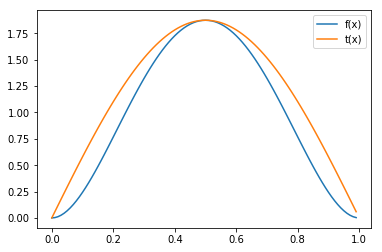

In [15]:
f = lambda x: 30*(x**2-2*x**3+x**4) 

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t = lambda x: max_f * np.sin(np.pi*x) * np.ones([len(x)])

x = np.arange(0, 1, 0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).


Primeramente propongo una función $$g(x) = \frac{t(x)}{c} $$ donde $c$ es igual a $$ \int_0^1asin(\pi x)dx = \frac{-acos(\pi)}{\pi}- \frac{-acos(0)}{\pi} = \frac{2a}{\pi} \geq 1$$

Es por esto de  $$g(x) = \frac{\pi sin(\pi x)}{2} $$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).

Para poder utilizar el método de la transformada inversa para generar variables aleatorias, debo de obtener $G(x)$ y esto se obtiene de integrar lo siguiente:
$$ \int_0^xg(x)dx = \int_0^x\frac{\pi sin(\pi x)}{2} dx $$
$$ G(x) = \frac{\pi}{2} \int_0^x sin(\pi x) dx $$
$$ G(x) = \frac{\pi}{2}[ \frac{cos(\pi x)}{\pi} + \frac{1}{\pi} ] $$

Al tener $G(x)$ igualamos a $U$ para conocer $x$:
$$ U = \frac{-cos(\pi x)}{2} + \frac{1}{2}$$
$$ \frac{cos(\pi x)}{2} = \frac{1}{2} - U$$
$$ cos(\pi x) = 1 - 2U$$
$$  x = \frac{cos(1 - 2U)}{\pi}$$


4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:


In [65]:
def transformada(N):
    return ((np.arccos(1-2*np.random.random(N)))/np.pi)

In [66]:
N=10000
X2 = transformada(N)

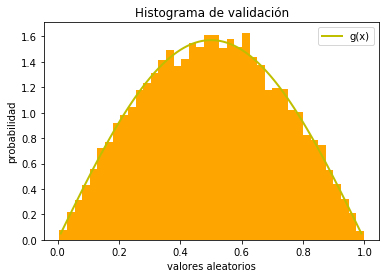

In [67]:
x = np.arange(0.01,1, 0.01)
y=(np.pi/2)*(np.sin(np.pi*x))


plt.plot(x,y,linewidth=2,color='y', label='g(x)')

plt.hist(X2,40,density=True,color='orange')
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('Histograma de validación')
plt.legend()
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

In [36]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
          for i in range(len(R1))] 
     #plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    
    return x

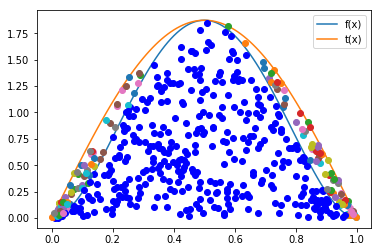

In [64]:
# Validación del método
N = 500 # número de puntos a simular

# Función objetivo 
f = lambda x: 30 * (x**2 -2 * x**3 + x**4) 

# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

# Función t -> Función constante
t = lambda x: (max_f * np.sin(np.pi*x))* np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
#print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.uniform(0, 1, size=N)
R1 = np.random.uniform(0, 1, size=N)

x_r =  Acep_rechazo(R2, R1, f, t)

 

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

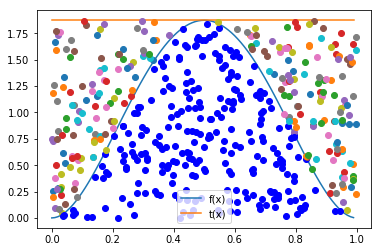

In [68]:
# Validación del método
N = 500 # número de puntos a simular

# Función objetivo 
f = lambda x: 30 * (x**2 -2 * x**3 + x**4) 

# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

# Función t -> Función constante
t = lambda x: (max_f)* np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
#print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size=N)

x_r =  Acep_rechazo(R2, R1, f, t)

 

> A partir del análisis visual de la aplicación del método Aceptación y Rechazo me percato de que cuando $t(x)$ es una constante se generan muchos más valores que se rechazan en comparación con cuando $t(x)$ es igual a una distribución senoidal ya que en ese caso reducimos el rango sobre el cuál se pueden generar los números aleatorios lo que hace que el porcentaje de números aceptados sea mayor.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [5]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
#     [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
#          for i in range(len(R1))] 
#     plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    
    return x

El máximo de f es: [2.109375]


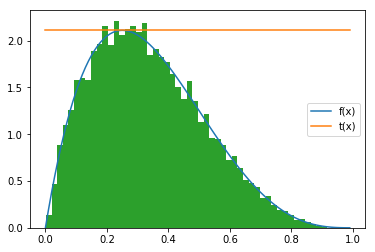

In [6]:
N = 100

# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 20000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(0, 1, size=N)

x_r =  Acep_rechazo(R2, R1, f, t)

y,x_n, _ = plt.hist(x_r, bins=50, density=True)

8. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

> $$\frac{P(k+1)}{P(k)}=\frac{\frac{e^-\lambda \lambda^(k+1)}{(k+1)!}}{\frac{e^\lambda \lambda^(k)}{(k)!}}$$
> $$ = \frac{\lambda^k+1 k!}{\lambda^k (k+1)!}$$
> $$ = \frac{\lambda}{(k+1)}$$
Por lo tanto 
> $$ P(k+1) = \frac{\lambda}{(k+1)}P(k)$$



In [91]:
# Función que calcula la probabilidad acumulada optimizada
def Acumulada_Poisson(k,l):
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)*(l**k)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(l/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

In [92]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

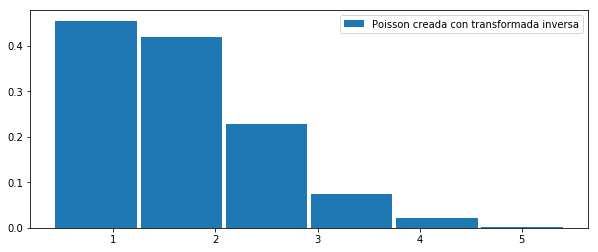

In [93]:
k = 10; l = 1; N = 1000

p_acum = Acumulada_Poisson(k,l)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)
plot_histogram_discrete(d_binomial, 'Poisson creada con transformada inversa')
